# CSCI 632 Homework 4

**Errata**

Problem 1(c) refers to (a) when it should refer to (b).

Problem 1(e) refers to (c) when it should refer to (d). 

Problem 1(f), $\nabla_x\mathbf{x}^T A \mathbf{x} = 2 A \mathbf{x}$ should be $\nabla_x\mathbf{x}^T A \mathbf{x} = 2 (A + A^T) \mathbf{x}$.

Corrected some numbering in equations in the "Maximum Likelihood Estimation with Gaussian Discriminant Analysis" section.

Corrected problem reference in "Apply the same unit test on your data set created in 3(a)" to 6(a).

Corrected reference Problem 4 to Problem 6 in "Using the training and test dataset from `p6_data.csv` used in Problem 4."

Corrected references to `p4_data.csv` to `p6_data.csv` and old references from `p6_data.csv` to `p8_data.csv`.

Corrected "Vortex Flow" example because I had left out one factor in the plot that did appear in the derivation.
This changes the plot to look more like colliding forces than a vortex, so I renamed the example and fixed the plot.

Corrected Problem 9 refered to problem 5 when it should've referred to problem 7.

**Instructions**

* **Insert all code, plots, results, and discussion** into this Jupyter Notebook.
* Your homework should be submitted as a **single Jupyter Notebook** (.ipynb file).
* While working, you use Google Colab by uploading this notebook and performing work there. Once complete, export the notebook as a Jupyter Notebook (.ipynb) and submit it to **Blackboard.**

You can answer mathematical questions either by:
* using LaTeX in a markdown cell, or
* pasting a scanned or photographed handwritten answer.

In [15]:
from IPython.display import display, Math

# Converts a numpy array to a LaTeX matrix
def latex_matrix(matrix):
    latex_str = r'\begin{bmatrix}'
    for row in matrix:
        latex_str += ' & '.join(map(str, row)) + r' \\'
    latex_str += r'\end{bmatrix}'
    return latex_str

def print_matrix(matrix):
    display(Math(latex_matrix(matrix)))


## Part I. Gradients

Some problems involving matrix calculus.  Even those who have taken a linear algebra course may not be
familiar with matrix calculus.   So let's do a few problems starting from the more familiar scalar calculus 
and then vector calculus.

* $x$ is a scalar. $f(x)$ is a scalar function means the output is a scalar. $\nabla = \nabla_x = \frac{d}{dx}$. Ex: $\nabla_x x^2 = 2x$.
* $\mathbf{x}$ is a vector.  $f(\mathbf{x})$ is a scalar function that takes a vector argument.

$$\nabla f(\mathbf{x}) = \begin{bmatrix}
  \frac{\partial f}{\partial x_1} \\
  \frac{\partial f}{\partial x_2} \\
  \vdots \\
  \frac{\partial f}{\partial x_n} \\
\end{bmatrix}
$$

#### Example I.1: Gradient of a paraboloid

$$f(\mathbf{x}) = -(x_1^2 + x_2^2)$$

$$\nabla f(\mathbf{x}) = \begin{bmatrix} -2x_1 \\ -2x_2 \end{bmatrix}$$

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def f(x1, x2):
    return -(x1**2 + x2**2)/10


# Generate the grid
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)    # populates two dimensional arrays wherein one represents x-values and the other y-values
                                # This is a bit redundant, but numpy will evalute the function by sweeping across both
                                # matrices in parallel using vector operations.
Y = f(X1, X2)                   # evaluates at every (x1, x2) position in the X1, X2 matrices.



In [17]:
# Compute the gradients
#grad_x1, grad_x2 = np.gradient(Y, x1, x2)  This doesn't do what I expected.
#print(grad_x1)
#print(grad_x2)

grad_x1 = -2*X1/10
grad_x2 = -2*X2/10
#print(gradX1)

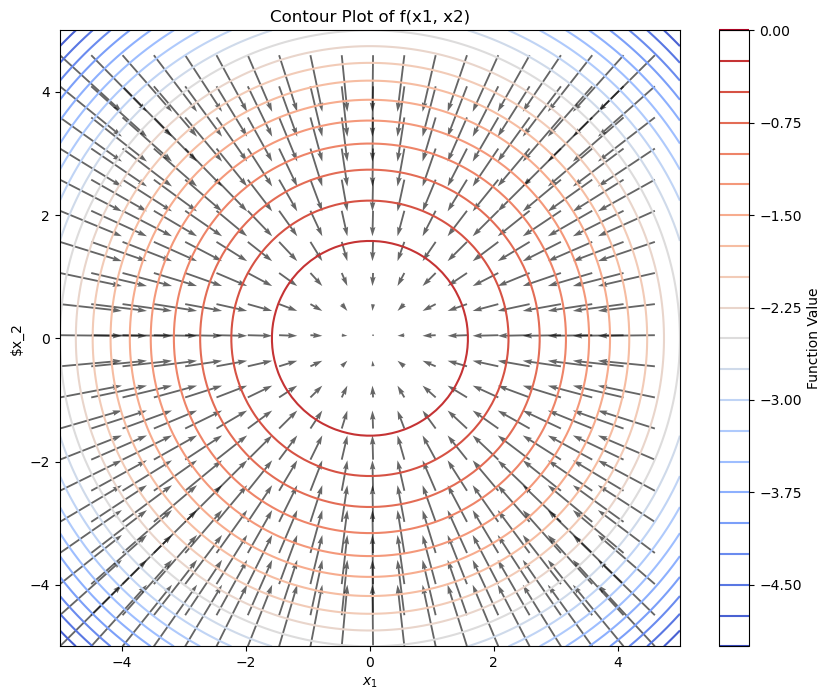

In [18]:
# Select every 5th point for a sparse quiver plot
skip = (slice(None, None, 5), slice(None, None, 5))

# Plot the contour and the sparser gradients
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Y, levels=20, cmap='coolwarm')
plt.quiver(X1[skip], X2[skip], grad_x1[skip], grad_x2[skip], color='black', angles='xy', scale_units='xy', scale=1, alpha=0.6)

# Add labels and display the plot
plt.title("Contour Plot of f(x1, x2)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2")
plt.colorbar(contour, label="Function Value")
plt.show()

#### Example I.2: Gradient of a highly eccentric ellipsoid

$$f(\mathbf{x}) = -10x_1^2 -x_2^2,\quad \nabla f(\mathbf{x}) = \begin{bmatrix}
  \frac{\partial}{\partial x_1} -10x_1^2 -x_2^2 \\
  \frac{\partial}{\partial x_2} -10x_1^2 -x_2^2
\end{bmatrix} = \begin{bmatrix}
-20 x_1 \\
-2 x_2
\end{bmatrix}$$
  

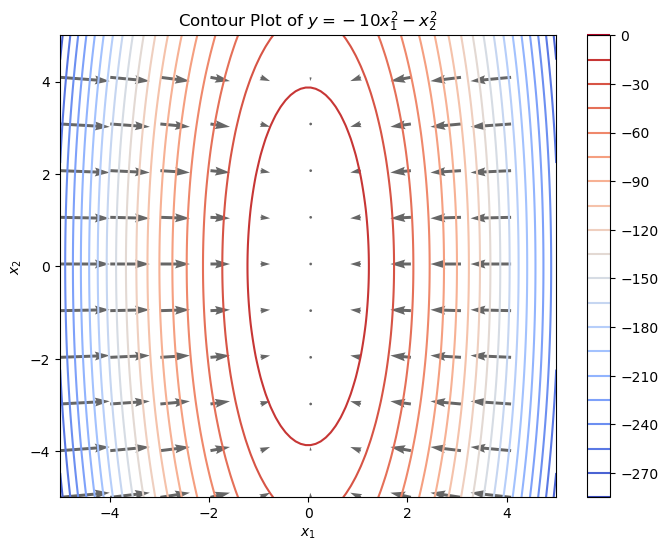

In [19]:
# Define a new function for the more eccentric ellipsoid
def ellipsoid(x1, x2):
    return -10 * x1**2 - x2**2 

x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
X1, X2 = np.meshgrid(x1, x2)    # populates two dimensional arrays wherein one represents x-values and the other y-values
                                # This is a bit redundant, but numpy will evalute the function by sweeping across both
                                # matrices in parallel using vector operations.
Y = ellipsoid(X1, X2)           # evaluates at every (x1, x2) position in the X1, X2 matrices.

# Adjust spacing to reduce the number of gradient vectors
new_spacing = 10  
X1_sub = X1[::new_spacing, ::new_spacing]
X2_sub = X2[::new_spacing, ::new_spacing]

# Compute gradient vectors 
grad_x1 = -20 * X1_sub
grad_x2 = -2 * X2_sub

# Plot the contour plot with selectively placed gradient vectors on the more eccentric ellipsoid
plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, Y, levels=20, cmap="coolwarm")
plt.colorbar(contour)

# Add fewer gradient vectors selectively at level curve positions
plt.quiver(X1_sub, X2_sub, grad_x1, grad_x2, color='black', angles='xy', scale_units='xy', scale=100, alpha=0.6)

plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Contour Plot of $y = -10x_1^2 - x_2^2$')
plt.show()

Note that the gradient vectors in the ellipsoid contour plot do not all point directly at the peak.  Instead
they point perpendicular to the contour curves.  

#### Example I.3: Colliding flows

$$
f(\mathbf{x}) = x_1 x_2^2 + a x_2,\quad \\
\nabla f(\mathbf{x}) = \begin{bmatrix}
  \frac{\partial}{\partial x_1} (x_1 x_2^2 + a x_2) \\
  \frac{\partial}{\partial x_2} (x_1 x_2^2 + a x_2)
\end{bmatrix} = 
\begin{bmatrix}
  x_2^2 \\
  2 x_1 x_2 + a
\end{bmatrix}
$$

In [20]:
a = 0.5

def f(x1, x2):
    return x1 * x2**2 + a * x2

Y = f(X1, X2) 

# compute gradient
grad_x1 = X2**2   # performs an elementwise squaring.  It is taking the Hadamard product of X2 with itself.
grad_x2 = 2 * X1 * X2 + a


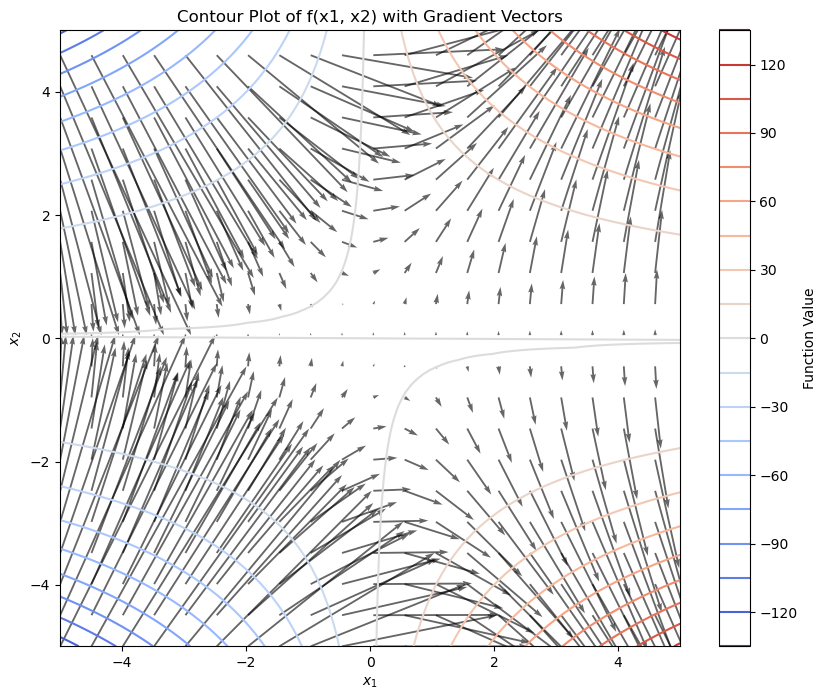

In [22]:
# Select every 5th point for a sparse quiver plot
skip = (slice(None, None, 5), slice(None, None, 5))

# Plot the contour and the sparser gradients
plt.figure(figsize=(10, 8))
contour = plt.contour(X1, X2, Y, levels=20, cmap='coolwarm')
plt.quiver(X1[skip], X2[skip], grad_x1[skip], grad_x2[skip], color='black', angles='xy', scale_units='xy', scale=10, alpha=0.6)

# Add labels and display the plot
plt.title("Contour Plot of f(x1, x2) with Gradient Vectors")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.colorbar(contour, label="Function Value")
plt.show()

* $\mathbf{x}$ is a vector, $y$ is a scalar.

$$\nabla_{\mathbf{x}} f(\mathbf{x},y) = \begin{bmatrix}
  \frac{\partial f}{\partial x_1} \\
  \frac{\partial f}{\partial x_2} \\
  \vdots \\
  \frac{\partial f}{\partial x_n} \\
\end{bmatrix}
$$ 

When we specify a subscript to the $\nabla$ the gradient is only taken with respect to the variables specified
in the subscript.


#### Example I.4:

$$
f(\mathbf{x}, y) = x_1 x_2^2 y + a x_2,\quad \\
\nabla_\mathbf{x} f(\mathbf{x}, y) = \begin{bmatrix}
  \frac{\partial}{\partial x_1} x_1 x_2^2 y + a x_2 \\
  \frac{\partial}{\partial x_2} x_1 x_2^2 y + a x_2
\end{bmatrix} = 
\begin{bmatrix}
  y x_2^2 \\
  2 x_1 x_2 y + a
\end{bmatrix}
$$

* $\mathbf{x}$ is a column vector.  $A$ is a square matrix.  $f(\mathbf{x}) = \mathbf{x}^T A \mathbf{x}$.

Because $f(\mathbf{x}) = \mathbf{x}^T A \mathbf{x}$ is a scalar function, we can apply the gradient.

#### Example I.5:

\begin{align}
  \nabla_{\mathbf{x}}
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix}^T \begin{bmatrix}
    2 & 1 \\
    1 & 3
  \end{bmatrix} 
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix}
&= \nabla_{\mathbf{x}}
  \begin{bmatrix}
    2 x_1 + x_2 & x_1 + 3 x_2
  \end{bmatrix} 
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix} \\
  \\
&= \begin{bmatrix}
  \frac{\partial}{\partial x_1} (2 x_1^2 + x_1 x_2 + x_1 x_2 + 3 x_2^2) \\
  \frac{\partial}{\partial x_2} (2 x_1^2 + x_1 x_2 + x_1 x_2 + 3 x_2^2)
  \end{bmatrix} \\
  \\
&= \begin{bmatrix}
    4 x_1 + 2 x_2 \\
    2 x_1 + 6 x_2
  \end{bmatrix} \\
  \\
&= 2 \begin{bmatrix}
    2 x_1 + x_2 \\
    x_1 + 3x_2
  \end{bmatrix} \\
  \\
&= 2 \begin{bmatrix}
 2 & 1 \\
 1 & 3
\end{bmatrix}
  \begin{bmatrix}
    x_1 \\
    x_2
  \end{bmatrix} \\
  \\
&= 2 A \mathbf{x}
\end{align}

This is analogous to taking the derivative of the 1-d scalar function of $f(x) = a x^2$.

$$\frac{d}{dx} f(x) = \frac{d}{dx} a x^2 = 2 a x$$

Example I.5, illustrates a general matrix calculus rule:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = 2 A \mathbf{x}$$


#### Gradient Chain Rule

With gradients, we can replace a variable with another in an analogous manner as we would in scalar calculus.

Suppose we have $f(\mathbf{x}) = e^{x_1^2 + x_2^2)$ and we want to compute $\nabla_x f(\mathbf{x})$, 
we could decompose $f$ into two functions and apply a change of variables to simplify the derivative into
a familiar form.

$$f(\mathbf{x}) = g(h(\mathbf{x}))$$

where $u = h(\mathbf{x}) = x_1^2 + x_2^2$ and $g(u) = e^{\mathbf{u}}$

$$\nabla_x f(\mathbf{x}) =  \nabla_x h(\mathbf{x})~\nabla_u g(u)$$

Since $u$ is a scalar, $\nabla_u = \frac{d}{du}$, so we can rewrite this as

$$\nabla_x f(\mathbf{x}) = \nabla_x h(\mathbf{x})~\frac{d}{du} g(u)$$


Substituting in the definitions of $g(u)$ and $h(\mathbf{x})$ yields

$$\nabla_x f(\mathbf{x}) = \nabla_x (x_1^2 + x_2^2)~\frac{d}{du} e^u$$


$$\nabla_x f(\mathbf{x})  = \begin{bmatrix} 2x_1 \\ 2x_2 \end{bmatrix} \cdot e^{x_1^2 + x_2^2} .$$

Which can be rearranged to yield

$$\nabla_x f(\mathbf{x})  =  \begin{bmatrix} 2x_1 e^{x_1^2 + x_2^2} \\ 2x_2 e^{x_1^2 + x_2^2} \end{bmatrix}.$$



```


```

# Problem 1

**(a)** From Example I.4, find $\nabla_y f(\mathbf{x}, y)$.

**(b)** Given $f(\mathbf{x}) = (x_1+2)^2 - (x_2 -1)^2$, find $\nabla f(\mathbf{x})$, the gradient of $f$ with respect to $\mathbf{x}$.  Note: $\nabla f(\mathbf{x}) = \nabla_{\mathbf{x}} f(\mathbf{x})$ since $\mathbf{x} = (x_1, x_2)$ includes all variables in $f(\mathbf{x})$.

**(c)** Plot the contour plot for $\nabla_x f(\mathbf{x})$ given in part (b), overlaying gradient vectors.

**(d)** Given $f(\mathbf{x}) = e^{-x_1^2}e^{-2x_2^2}$, find $\nabla_x f(\mathbf{x})$.

**(e)** Plot the contour plot for $\nabla_x f(\mathbf{x})$ given in part (d), overlaying gradient vectors.

**(f)** Show that $\nabla_x\mathbf{x}^T A \mathbf{x} = (A + A^T) \mathbf{x}$ for $A = \begin{bmatrix} 3 & 7 \\ 0 & 1 \end{bmatrix}$




## Part II. Jacobian

* $\mathbf{x}$ is a vector and $\mathbf{f(x)}$ is a vector function.  In other words,

$$\mathbf{f}(\mathbf{x}) = \begin{bmatrix}
  f_1(\mathbf{x}) \\
  f_2(\mathbf{x}) \\
  \vdots \\
  f_n(\mathbf{x})
\end{bmatrix}
$$


When the function is a vector function we use the Jacobian.

$$
J_{\mathbf{f}}(\mathbf{x}) = \begin{bmatrix} 
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n}\\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
  \vdots                            &                                   & \ddots & \\
  \frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \cdots & \frac{\partial f_n}{\partial x_n}
\end{bmatrix}
$$

In machine learning, statistics, and economics, it is
common to use the $\nabla$ to denote a Jacobian when operating on a vector function. Although mathematicians may object
since the gradient is strictly speaking applied to a scalar function.
As such,

$$\nabla \mathbf{f}(\mathbf{x}) = \begin{bmatrix} 
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n}\\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n} \\
  \vdots                            &                                   & \ddots & \\
  \frac{\partial f_n}{\partial x_1} & \frac{\partial f_n}{\partial x_2} & \cdots & \frac{\partial f_n}{\partial x_n}
\end{bmatrix}
$$

Each row of the Jacobian is the gradient of a component in the vector function.  For example, the first row transposed is

$$
\nabla f_1(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f_1}{\partial x_1} \\
\frac{\partial f_1}{\partial x_2} \\
\vdots \\
\frac{\partial f_1}{\partial x_n}
\end{bmatrix}
$$



* $\mathbf{x}$ is a column vector. $\mathbf{f}(\mathbf{x}) = A \mathbf{x}$ is a vector function.

$$\nabla_{\mathbf{x}} A \mathbf{x} = A$$

But to demonstrate this, we need to use the definition of the Jacobian.

Ex:

$$\nabla_{\mathbf{x}}
\begin{bmatrix}
  1 & 2 \\
  3 & 5
\end{bmatrix} 
\begin{bmatrix}
  x_1 \\
  x_2
\end{bmatrix} = \nabla_{\mathbf{x}}
\begin{bmatrix}
  x_1  + 2 x_2 \\
  3 x_1 + 5 x_2
\end{bmatrix} =
\begin{bmatrix}
  \frac{\partial}{\partial x_1} (x_1  + 2 x_2)  & \frac{\partial}{\partial x_2} (x_1  + 2 x_2) \\
  \frac{\partial}{\partial x_1} (3 x_1 + 5 x_2) & \frac{\partial}{\partial x_2} (3 x_1 + 5 x_2) \\
\end{bmatrix} =
\begin{bmatrix}
  1 & 2 \\
  3 & 5
\end{bmatrix} 
$$

This is analogous to taking the derivative of the 1-d scalar function of $f(x) = a x$.

$$\frac{d}{dx} f(x) = \frac{d}{dx} ax = a$$

# Problem 2

**(a)** Find the Jacobian $\nabla \mathbf{f}(\mathbf{x})$ where $\mathbf{f}(\mathbf{x})$ is given by

$$\mathbf{f}(\mathbf{x}) = \begin{bmatrix} x_1^2 \\ x_1 x_2 \\ \sin(x_2) \end{bmatrix}$$

**(b)** Show the Jacobian $\nabla_x A \mathbf{x} = A$ for $A = \begin{bmatrix} 3 & -2 \\ 5 & 1 \end{bmatrix}$.  Show each step.

**(c)** Find the Jacobian $\nabla \mathbf{g}(\mathbf{x})$ where $\mathbf{g}(\mathbf{x}) = B \mathbf{x} + \mathbf{c}$ with

$$
B = \begin{bmatrix}
  1 & 2 \\ 
  3 & 4
\end{bmatrix}, \quad \mathbf{c} = \begin{bmatrix}
 5 \\ 
 6
 \end{bmatrix}, \quad \mathbf{x} = \begin{bmatrix}
 x_1 \\
 x_2
\end{bmatrix}
$$

**(d)** Compute the Jacobian $\nabla \mathbf{p}(\mathbf{x})$ for a transformed input $\mathbf{x} = T \mathbf{z}$, where $\mathbf{p}(\mathbf{z}) = A \mathbf{x} = A(T \mathbf{z})$. Assume $A$ and $T$ are constant matrices.


## Part III. Trace operator

The trace operator is the sum of the diagonal elements of a square matrix.

$$
\operatorname{tr}(A) = \sum_{i=1}^n A_{ii}
$$

let $A$ be

$$A = \begin{bmatrix}
  1 & 3 \\
  2 & 7 
\end{bmatrix}
$$

$$
\operatorname{tr}(A) = 1 + 7 = 8
$$


The trace operator has some interesting properties.

### III.1. Linear

$$\operatorname{tr}(A + B) = \operatorname{tr}(A) + \operatorname{tr}(B)$$
$$\operatorname{tr}(cA) = c \operatorname{tr}(A)$$

Example:

$$A = \begin{bmatrix}
  1 & 3 \\
  2 & 7 
\end{bmatrix},\quad 
B = \begin{bmatrix}
  4 & 0 \\
  1 & 1 
\end{bmatrix}
$$

$$
\operatorname{tr}(A) + \operatorname{tr}(B) = 8 + 5 = 13
$$

$$
\operatorname{tr}(A+B) = \operatorname{tr} \begin{bmatrix}
  5 & 3 \\
   3 & 8 
\end{bmatrix} = 8 + 5 = 13
$$

### III.2. Cyclic

$$\operatorname{tr}(ABC) = \operatorname{tr}(BCA) = \operatorname{tr}(CAB)$$

Example:

$$A = \begin{bmatrix}
  1 & 2 \\
  3 & 7 
\end{bmatrix},\quad 
B = \begin{bmatrix}
  4 & 0 \\
  1 & 1 
\end{bmatrix},\quad
C = \begin{bmatrix}
  2 & 1/2 \\
  2 & 1 
\end{bmatrix}
$$


In [55]:
import numpy as np

# Python uses a column major representation, meaning
# A[i][j] = A_{ij}.
                 
A = np.array(  
    [ [ 1, 2 ],
      [ 3, 7 ] 
    ]) 
B = np.array(
    [ [4, 0],
      [1, 1]
    ])
C = np.array(
    [ [2, 1/2],
      [2, 1]
    ])

display(Math(f"$$ABC={latex_matrix(A@B@C)}$$"))
display(Math(f"$$\operatorname{{tr}}(ABC)={np.trace(A@B@C)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [50]:
np.trace(A)

8

In [58]:
display(Math(f"$$BCA={latex_matrix(B@C@A)}$$"))
display(Math(f"$$\operatorname{{tr}}(BCA)={np.trace(B@C@A)}"))
display(Math(f"$$CAB  ={latex_matrix(C@A@B)}$$"))
display(Math(f"$$\operatorname{{tr}}(CAB)={np.trace(C@A@B)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## III.3. Trace equal to the Trace of a Transpose

$$\operatorname{tr}(A) = \operatorname{tr}(A^T)$$

Ex:

$$A = \begin{bmatrix}
  1 & 3 \\
  2 & 7 
\end{bmatrix},\quad
A^T = \begin{bmatrix}
  1 & 2 \\
  3 & 7 
\end{bmatrix}
$$

$$\operatorname{tr}(A) = 1 + 7,\quad \operatorname{tr}(A^T) = 1 + 7$$




## III.4. Trace of an Outer Product

Where $\mathbf{x}$ and $\mathbf{y}$ are column vectors.

$$\operatorname{tr}(\mathbf{x} \mathbf{y}^T) = \mathbf{x}^T \mathbf{y}$$

Ex:

$$\mathbf{x} = \begin{bmatrix}
1 \\
2
\end{bmatrix},\quad \mathbf{y} = \begin{bmatrix}
3 \\
4
\end{bmatrix}, \quad \mathbf{x} \mathbf{y}^T = \begin{bmatrix}
3 & 4 \\
6 & 8
\end{bmatrix}
$$

$$\operatorname{tr} \bigg( \begin{bmatrix}
3 & 4 \\
6 & 8
\end{bmatrix} \bigg) = 3 + 8 = 11$$

$$\mathbf{x}^T \mathbf{y} = 1 \cdot 3 + 2 \cdot 4 = 11$$


# Problem 3 

**(a)** Find $\operatorname{tr}(A)$, showing how and then confirm with numpy for the $A$ given below. 

$$
A = \begin{bmatrix} 4 & -2 & 3 \\ -1 & -5 & -6 \\ 7 & -3 & 2 \end{bmatrix}
$$

**(b)**  Find 

$$\operatorname{tr}(\begin{bmatrix}
4 & 7 \\
1 & 3
\end{bmatrix}^T)
$$



**(c)** Given 

$$
A = \begin{bmatrix}
 7 & 1/2 & 1/2 \\
 4 & 2   & 3 \\
 8 & 1   & 1
\end{bmatrix}, 
B = \begin{bmatrix} 
 5 & 9 & 7 \\
 8 & 4 & 3 \\
 9 & 9 & 8 
\end{bmatrix},
C = \begin{bmatrix} 
 9 & 4 & 4 \\
 4 & 1 & 8 \\
 6 & 5 & 5
\end{bmatrix}
$$
and 

$$\operatorname{tr}(ABC) = 2852.5$$.

Find $\operatorname{tr}(BCA)$.

### Part IV.  Matrix Derivatives

* $f(A)$ is a scalar function. $A$ is an $m \times n$  matrix.

$$\nabla_A f(A) = \begin{bmatrix}
  \frac{\partial f}{\partial A_{11}} & \frac{\partial f}{\partial A_{12}} & \cdots & \frac{\partial f}{\partial A_{1n}} \\
  \frac{\partial f}{\partial A_{21}} & \frac{\partial f}{\partial A_{22}} &        & \frac{\partial f}{\partial A_{2n}} \\
  \vdots                            &                                     & \ddots & \vdots \\
  \frac{\partial f}{\partial A_{m1}} & \frac{\partial f}{\partial A_{m2}} & \cdots & \frac{\partial f}{\partial A_{mn}} 
  \end{bmatrix}
$$

More succinctly put

$$\nabla_A f(A) = 
\left( \nabla_A f \right)_{ij} = \frac{\partial f(A)}{\partial A_{ij}}
$$



* $A$ and $X$ are matrices.  $\nabla_X AX = ????$

So far we have used the $\nabla$ operator in two ways: when applied to a scalar function it means that we take
the gradient, when applied to a vector function it means to take the Jacobian.  To extend the notion of the 
gradient to matrix derivatives, we need to scalarize the expression so that standard differentiation rules apply.

### Scalarization via the Trace Operator

The trace operator reduces a matrix expression to a scalar by summing its diagonal elements.
This allows us to apply the gradient operator to matrix expressions in a way consistent with
scalar calculus. Thus, we define:

$$
\nabla_X AX = \nabla_X \operatorname{tr}(AX)
$$

This approach is commonly referred to as the *trace trick*. By applying the trace operator,
we transform the matrix expression into a scalar function of  X , making it possible to take
the gradient with respect to $X$.

For example, 

\begin{align}
\nabla_X AX = \nabla_X \operatorname{tr}(AX) &= \nabla_X \operatorname{tr}\bigg(\begin{bmatrix}
 & (a_{11} x_{11} + a_{12} x_{21} + \cdots + a_{1n} x_{n1}) \hspace{1.5in} \cdots \\
 & \vdots  \hspace{0.3in} (a_{21} x_{12} + a_{22} x_{22} + \cdots + a_{2n} x_{n2}) && \vdots\\
 &                                         \hspace{2.5in}  &\ddots                  &&\vdots \\
 & \cdots                                   && (a_{n1} x_{1n} + a_{n2} x_{2n} + \cdots + a_{nn} x_{nn}) \\
 \end{bmatrix}\bigg)  \\
 \\
 &= \nabla_X \operatorname{tr}\bigg(\begin{bmatrix}
 & (\sum_{i=1}^n a_{1i} x_{i1}) \hspace{1.5in} &\cdots \\
 &  \vdots \hspace{0.3in} (\sum_{i=1}^n a_{2i} x_{i2}) &&\vdots \\
 &                                                 &\ddots & \\
 & \cdots                                             && (\sum_{i=1}^n a_{ni} x_{in})
 \end{bmatrix}\bigg) \\
 \\
 &= \nabla_X \sum_{j=1}^n \sum_{i=1}^n a_{ji} x_{ij} 
 \end{align}

Now we have reduced the matrix to a scalar function.  

Let $f(X) = \sum_{j=1}^n \sum_{i=1}^n a_{ji} x_{ij}$ and the above becomes

$$\nabla_X f(X) = \begin{bmatrix}
  \frac{\partial f}{\partial x_{11}} & \frac{\partial f}{\partial x_{12}} & \cdots & \frac{\partial f}{\partial x_{1n}} \\
  \frac{\partial f}{\partial x_{21}} & \frac{\partial f}{\partial x_{22}} &        & \frac{\partial f}{\partial x_{2n}} \\
  \vdots                            &                                     & \ddots & \vdots \\
  \frac{\partial f}{\partial x_{m1}} & \frac{\partial f}{\partial x_{m2}} & \cdots & \frac{\partial f}{\partial x_{mn}} 
  \end{bmatrix} = \begin{bmatrix}
    a_{11} & a_{21} & \cdots & a_{n1} \\
    a_{12} & a_{22} & \cdots & a_{n2} \\
    \vdots &        & \ddots &  \vdots \\
    a_{1n} & a_{2n} & \cdots & a_{nn}
  \end{bmatrix} = A^T
$$



## Problem 4

**(a)** Use the trace operator to find $\nabla_A x^T A x~$.  This is more general than in problem 1, since I have not 
specified values for A.  Hint: the trace of a scalar is itself.  2nd Hint: use the cyclic property of the trace operator.


**(b)** Consider a machine learning model $\hat{y} = h_{\boldsymbol{\Theta}}(\mathbf{x})$ 
where the input is a feature vector $\mathbf{x}$, and $\boldsymbol{\Theta}$ is a
parameter vector.  We are given a training set $\{\mathbf{x}^{(i)}, y^{(i)}\}$. 
However, it is common in machine learning to represent the training set as a design matrix $X$ and
a result vector $\mathbf{y}$.  The design matrix is an $m \times n$ matrix where each
row corresponds to a feature vector for a specific datapoint in the training set and each
column represents a feature.  There are $m$ rows corresponding to there being $m$ data points.
There are $n$ columns corresponding to there being $n$ features in each feature vector.

Consider a loss function $J(\mathbf{\Theta})$ where $\mathbf{y}$ are the expected outputs from a training set
and $\mathbf{\hat{y}}$ are the model outputs.  $\lambda$ is a constant.  Find the gradient of the
loss function $\nabla_{\boldsymbol{\Theta}} J(\mathbf{\Theta})$.

$$J(\boldsymbol{\Theta}) = (\mathbf{\hat{y}} - \mathbf{y})^T (\mathbf{\hat{y}} - \mathbf{y}) + \lambda \mathbf{\hat{y}}^T \mathbf{\hat{y}} $$

where $\mathbf{\hat{y}} = X\mathbf{\Theta}$.  

Aside: $\lambda \mathbf{\hat{y}}^T \mathbf{\hat{y}}$ is a regularization term.  It punishes the
model for outputs that are far from the origin.  Regularization terms help generalize a model
by restraining extreme ouputs which can occur when a model exhibits overfitting.


**(c)** Now consider when $X$ is an $n \times n$ matrix rather than a vector.  Find the matrix 
derivative $\nabla_X f(X)$ where $f(X)$ is given by

$$f(X) = X^T A X$$

Hint: use the $\operatorname{tr}$ definition of taking the gradient with respect to a matrix and 
use the cyclic property of trace functions.


## Maximum Likelihood Estimation with Gaussian Discriminant Analysis


In lecture, for Gaussian Discriminant Analysis using binary classification, 
I used Maximum Likelihood Estimation (MLE) to derive the maxmimum likelihood 
parameter $\phi$ where $\phi$ is the prior probability for class $1$. 

Let $\mathbf{\Theta}$ denote the set of parameters we will optimize to achieve
the maximum likelihood.

Let $L(\mathbf{\Theta})$ denote the likelihood function for parameters $\mathbf{\Theta}$.

Let $m$ denote the number of samples in the training data set $\{\mathbf{x}^{(i)}, y^{(i)}\}$.

  $$L(\mathbf{\Theta}) = P\big(~(\mathbf{x}^{(1)}, y^{(1)}),~(\mathbf{x}^{(2)}, y^{(2)}), \dots,~(\mathbf{x}^{(m)}, y^{(m)}) ; \mathbf{\Theta}\big) \hspace{2in}(3.1)$$

Assume the samples $\{\mathbf{x}^{(i)}, y^{(i)}\}$ are all i.i.d., i.e., independent
and identically distributed.  Independence is important because it means 
$P(E \text{ and } F \text{ and } G) = P(E)P(F)P(G)$.  For an arbitrary number of events $E_i$ this means 

  $$P(E_1 \text{ and } E_2 \dots \text{ and } E_m) = P(E_1)P(E_2)\cdots P(E_m) = \prod_{i=1}^m P(E_i) \hspace{2in}(3.2)$$

Independence between samples in our training data set implies that $(3.1)$ becomes 

$$L(\Theta) = \prod_{i=1}^{m} P\big(\mathbf{x}^{(i)}, y^{(i)}~;~\mathbf{\Theta}\big) \hspace{2in}(3.3)$$

The definition of *conditional probability*, also sometimes called the *product rule*, is

$$P(AB) = P(A|B) P(B) = P(B|A) P(A) \hspace{2in}(3.4)$$

Applying product rule $(3.4)$ to $(3.3)$ yields

$$L(\Theta) = \prod_{i=1}^{m} P\big(\mathbf{x}^{(i)} | y^{(i)}; \mathbf{\Theta}\big) \cdot P(y^{(i)}) \hspace{2in}(3.5)$$

$P(y^{(i)})$ is the prior probability of class $y^{(i)}$.

Let $\phi = P(y=1)$ and thus $1-\phi = P(y=0)$.

We can use the trick of placing $y$ and $1-y$ in the exponents as in

\begin{align}
   y=0 &:& \phi^y(1-\phi)^{(1-y)} = 1-\phi \\
   y=1 &:& \phi^y(1-\phi)^{(1-y)} = \phi
\end{align}

Substituting the above into (3.5) yields

$$L(\mathbf{\Theta}) = \prod_{i=1}^{m} P\big[\mathbf{x}^{(i)} | y^{(i)}; \mathbf{\Theta}\big] \cdot \phi^{y^{(i)}} (1-\phi)^{(1-y^{(i)})} \hspace{2in}(3.6)$$


With Gaussian Discriminant Analysis (GDA), we make two assumptions:

1) the likelihood probability of $\mathbf{x}$ given $y$ for each class is Gaussian.

2) *homoscedasticity* meaning all classes have the same covariance matrix $\Sigma$.

The first assumption means

$$P(\mathbf{x} | y=0) = \mathcal{N}(\mathbf{x} ; \boldsymbol{\mu}_0,\Sigma)\hspace{2in}(3.7)$$

$$P(\mathbf{x} | y=1) = \mathcal{N}(\mathbf{x} ; \boldsymbol{\mu}_1,\Sigma)\hspace{2in}(3.8)$$

where $\mathbf{\Theta} = \{\phi, \mathbf{\mu}_0, \mathbf{\mu}_1, \Sigma\}$.
(3.7) is the likelihood probability density function for class 0.  (3.8) is the 
likelihood probability density function for class 1.

All samples are assumed to have been generated by one of these two distributions,
which can be expressed in condensed form by combining (3.7) and (3.8) and replacing $y$
with the class assigned $y^{(i)}$ for each sample $\mathbf{x}^{(i)}$.


$$P(\mathbf{x}^{(i)} | y^{(i)}) = \mathcal{N}(\mathbf{x}^{(i)} ; \boldsymbol{\mu}_{y^{(i)}},\Sigma)\hspace{2in}(3.9)$$

The second assumption is why $\boldsymbol{\Theta}$ contains two mean
$\boldsymbol{\mu}_0$ and $\boldsymbol{\mu}_1$ vectors but only one $\Sigma$ matrix.

By substituting $(3.9)$ into $(3.6)$, we get

$$L(\Theta) = \prod_{i=1}^{m} \mathcal{N}(\mathbf{x}^{(i)} | \boldsymbol{\mu}_{y^{(i)}},\Sigma) \cdot \phi^{y^{(i)}} (1-\phi)^{(1-y^{(i)})} \hspace{2in}(3.10)$$


With Maximum Likelihood Estimation (MLE), we solve for the parameters $\mathbf{\Theta}$ 
that maximize the likelihood with priors.

$$\mathbf{\Theta} = \arg\max_{\mathbf{\Theta}} L(\mathbf{\Theta})\hspace{2in}(3.11)$$

Because $\log(a) > \log(b)$ for all $a,b \in \mathbb{R}^+$, we can say

$$\text{if } f(a) > f(b) \text{ then } \log f(a) > \log f(b) \hspace{2in}(3.12)$$

This implies that the maximum value for $f(x)$ occurs at the same value for $x$ as 
the maximum value for $\log f(x)$.   As a consequence, taking the log of likelihood
function does not change where its maximum resides, so $(3.6)$ becomes

$$\mathbf{\Theta} = \arg\max_{\mathbf{\Theta}} L(\mathbf{\Theta}) = \arg\max_{\mathbf{\Theta}} \log L(\mathbf{\Theta})\hspace{1.5in}(3.13)$$

Let $\ell$ denote log-likelihood, i.e.,  $\ell = \log L(\mathbf{\Theta})$ and substitute it into $(3.13)$ yielding

$$\mathbf{\Theta} = \arg\max_{\mathbf{\Theta}} \ell(\mathbf{\Theta})\hspace{2in}(3.14)$$

Taking the log of $L$ from $(3.10)$  yields

\begin{align}
\log L(\mathbf{\Theta}) = \ell(\mathbf{\Theta}) &= \log \prod_{i=1}^{m} \mathcal{N}(\mathbf{x}^{(i)} ; \boldsymbol{\mu}_{y^{(i)}},\Sigma) \cdot \phi^{y^{(i)}} (1-\phi)^{(1-{y^{(i)}})} \\
               &= \sum_{i=1}^{m} \log \bigg(\mathcal{N}(\mathbf{x}^{(i)} ; \boldsymbol{\mu}_{y^{(i)}},\Sigma) \cdot \phi^{y^{(i)}} (1-\phi)^{(1-{y^{(i)}})}\bigg) \\
               &= \sum_{i=1}^{m} \big( \log \mathcal{N}(\mathbf{x}^{(i)} ; \boldsymbol{\mu}_{y^{(i)}},\Sigma) + y^{(i)} \log \phi + (1-y^{(i)}) \log (1-\phi) \big) \hspace{2in}(3.15)
\end{align}

Starting from the definition of a PDF for a multivariate Gaussian distribution

$$
\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{(2\pi)^k |\boldsymbol{\Sigma}|}} \exp \left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right) \hspace{2in}(3.16)
$$

we compute the log of the Gaussian PDF 



\begin{align}
  \log \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \boldsymbol{\Sigma}) &= -\frac{1}{2} \log ((2\pi)^k |\boldsymbol{\Sigma}|) + \log \exp \left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right) \\
  &= -\frac{k}{2} \log (2\pi) - \frac{1}{2} \log|\boldsymbol{\Sigma}| + \left(-\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})\right) \hspace{2in}(3.17)
\end{align}

The maximum likelihood occurrs where the gradient of the log likelihood is zero.  So we take the gradient of (3.15) after substituting in (3.17).   This yields

\begin{align}  
\nabla_{\boldsymbol{\Theta}} \ell(\boldsymbol{\Theta}) = 0 
  &= \sum_{i=1}^{m} \nabla_{\boldsymbol{\Theta}} \big( \cancel{-\frac{k}{2} \log (2\pi)} -\frac{1}{2}\log|\boldsymbol{\Sigma}| - \frac{1}{2} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}}) + y^{(i)} \log \phi + (1-y^{(i)})\log (1-\phi)\big) \hspace{0.5in} \\
  &= \sum_{i=1}^{m} \nabla_{\boldsymbol{\Theta}} \big( -\frac{1}{2}\log|\boldsymbol{\Sigma}| - \frac{1}{2} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}}) + y^{(i)} \log \phi + (1-y^{(i)})\log (1-\phi)\big) \hspace{0.5in} (3.18)
\end{align}


At this point we can separate the gradient out into its components and solve for each
component separately.  

\begin{align}
 0 &= \sum_{i=1}^m \nabla_\phi \ell(\boldsymbol{\Theta})     &\hspace{1in}& (3.19)\\
 0 &= \sum_{i=1}^m \nabla_{\mu_0} \ell(\boldsymbol{\Theta})  &\hspace{1in}& (3.20)\\
 0 &= \sum_{i=1}^m \nabla_{\mu_1} \ell(\boldsymbol{\Theta})  &\hspace{1in}& (3.21)\\
 0 &= \sum_{i=1}^m \nabla_{\Sigma} \ell(\boldsymbol{\Theta}) &\hspace{1in}& (3.22)
\end{align}


In lecture I solved for (3.19) to obtain $\phi$.  It only takes a few steps, so I'll include the derivation here.

$$
\nabla_{\phi} \ell(\boldsymbol{\Theta}) = 0 =
\sum_{i=1}^{m} \nabla_{\phi} \big( \cancel{-\frac{1}{2}\log|\boldsymbol{\Sigma}|} - \cancel{\frac{1}{2} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x}^{(i)} - \boldsymbol{\mu}_{y^{(i)}})} + y^{(i)} \log \phi + (1-y^{(i)})\log (1-\phi)\big) \hspace{0.5in} (3.23)
$$

Since $\phi$ is a scalar, the gradient with respect to $\phi$ can be interpreted as $\frac{\partial}{\partial \phi}$.  Thus (3.24) becomes

\begin{align}
\nabla_{\phi} \ell(\boldsymbol{\Theta}) = 0 &=
\sum_{i=1}^{m}  \frac{\partial}{\partial \phi} \big( y^{(i)} \log \phi + (1-y^{(i)})\log (1-\phi)\big) \\
  &= \sum_{i=1}^{m} \frac{y^{(i)}}{\phi} - \frac{1-y^{(i)}}{1-\phi}  \hspace{0.5in} (3.24)
\end{align}

$$\frac{1}{\phi(1-\phi)}\sum_{i=1}^m y^{(i)} = \frac{m}{1-\phi}$$

Rearranging yields

$$\phi = \frac{1}{m} \sum_{i=1}^m y^{(i)}$$  

## Problem 5

Problems 1-4 are meant to provide building blocks for solving this problem.

**(a)** Solve the Maximum Likelihood Estimate (MLE) for GDA to find the optimal values for
$\boldsymbol{\mu}_0$ and $\boldsymbol{\mu}_1$. The maximum likelihood occurs at 
$\nabla_{\boldsymbol{\Theta}} \ell(\boldsymbol{\Theta}) = 0$.   For $\boldsymbol{\mu}_0$ and $\boldsymbol{\mu}_1$,
this means $\nabla_{\boldsymbol{\mu_k}} \ell(\boldsymbol{\Theta}) = 0$ where $k$ denotes the class, i.e., $k \in \{0,1\}$.  This corresponds to $(3.20)$ and $(3.21)$.

Hint: The terms that contain no $\boldsymbol{\mu}_k$ have a gradient of 0, and $\nabla_A (A^T B A) = 2 B A$ 
where $B$ is a symmetric matrix.  $\boldsymbol{\Sigma}$ is a symmetric matrix.


**(b)** (extra credit 4 points) Solve the MLE problem for GDA to find the optimal values for $\boldsymbol{\Sigma}$.  This means
solving for the case where  $\nabla_{\boldsymbol{\Sigma}} \ell(\boldsymbol{\Theta}) = 0$.

Hint: $\nabla_A \log |A| = A^{-1}$ .  This is analogous to $\frac{d}{dx} \log x = \frac{1}{x}$ assuming the $\log$
is a natural logarithm.  This only holds if $A$ is invertible.

Hint: $\Sigma$ must be invertible because $\Sigma^{-1}$ appears in the definition of a multivariable Gaussian PDF. 
The multivariate Gaussian PDF is not defined if $\Sigma$ is not invertible.

Hint: 

$$\nabla_A (A^{-1} B) = -A^{-1} B A^{-1}.$$

For this to apply $A$ must be invertible.  $B$ is treated as a constant.

## Problem 6

Implement GDA using only numpy and standard python libraries.  No usage of any existing implementation of 
GDA is allowed.  

**(a)** Create a 2-d dataset that has random samples belonging to two classes where the data points
of each class are disjoint and are distributed uniformly within their respective regions.  Plot this dataset.

**(b)** Because the data points for the two data sets generated in (a) are disjoint, there exists no region of ambiguity.
Include unit tests within this jupyter notebook that confirm that the GDA achieves
100% accuracy on this constructed dataset.  Normally we would implement far more than one
unit test.

**(c)** Open the provided file `p6_data.csv`.  ` Divide the data into a training set and a test set.

In [9]:
import pandas as pd
...
# Load the data from the CSV file
data = pd.read_csv('p6_data.csv')

# Extract features and target variable from the dataset
X = data[['Feature_1', 'Feature_2']]  # the feature columns
y = data['Label']  # the target column
data


,Feature_1,Feature_2,Label
0,0.427171,-0.130027,0
1,4.646079,2.600236,0
2,1.256307,3.824867,0
3,5.175187,-0.416318,0
4,0.903690,-0.462555,0
...,...,...,...
1995,-6.536135,7.503992,1
1996,-9.446937,3.206772,1
1997,-1.711223,5.825631,1
1998,4.423962,-0.397844,0


**(d)** Train a model using your implementation of Gaussian Discriminant Analysis.

**(e)** Output the data labelling each sample according to its class, and
color the background in each area according to which side of the decision
boundary the area resides.

**(f)** Output model parameters and the error rate, i.e., 1-accuracy.

**(g)** Assuming the sample data is unbiased and thus represents the true
distribution of data that would be seen "in the real world," could a non-linear model improve the error rate?

**(h)** (up to 3 points extra credit) Find a non-linear method using PyTorch or scikit-learn
that reduces the error further.



## Problem 7

Implement logistic regression using only numpy and standard python libraries.  No existing implementation of
logistic regression is allowed.

**(a)** Apply the same unit test on your data set created in 6(a).

**(b)** Because the data points for the two data sets generated in (a) are disjoint, there exists no region of ambiguity.
Include unit tests within this jupyter notebook that confirm that logistic regression achieves
100% accuracy on this constructed dataset.  

**(c)** Using the training and test datasets from `p6_data.csv` used in Problem 6,
train a model using your implementation of logistic regression.

**(d)** Output the data labelling each sample according to its class, and
color the background in each area according to which side of the decision
boundary the area resides.

**(e)** Output model parameters and the error rate, i.e., 1-accuracy.


## Problem 8

Repeat problem 6(c)-(g) for data in `p8_data.csv`.  Aside: assume the unit test in (a) and (b) from problem 6 still apply.

**(h)** (up to 3 points extra credit) Find a non-linear method using PyTorch or scikit-learn
that reduces the error further on data `p8_data.csv`.


## Problem 9

Reapeat problem 5(c)-(e) for data `p8_data.csv` using the training and test data sets 
created in Problem 6.
